In [1]:
#Font style
from IPython.core.display import HTML
css = open('/home/ec2-user/blog/posts/style-table.css').read() \
+ open('/home/ec2-user/blog/posts/style-notebook.css').read()
HTML('<style>{}</style>'.format(css));

# Something really COOL for Dave

### Here, I demonstrate that we can make plots of SDSS spectra without downloading the actual fits file into a local machine. In this example, we grab the 1D spectrum of quasar Q1357+0525 from the SDSS DR12 Data Archive Server (DAS). 

### The wavelength range of the plot can be interactively adjusted, using the sliders.

## SDSS Notes:

   - ### Physical quantities pertinent to the object from SDSS can be accessed [here](http://skyserver.sdss.org/dr12/en/tools/explore/summary.aspx?plate=856&mjd=52339&fiber=501).

   - ### The 1D spectrum can be pre-viewed [here](http://skyserver.sdss.org/dr12/en/get/SpecById.ashx?id=963908073330599936).



In [2]:
import astropy.io.fits as fits
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

from ipywidgets import interact, fixed

%matplotlib inline

### We now grab the spectrum and plot. Extract the wavelength, flux and error columns.

In [3]:
def plot_spec(min_wave=3800, max_wave=9200):
    spec, header = fits.getdata('http://dr12.sdss3.org/sas/dr12/sdss/spectro/redux/26/spectra/0856/spec-0856-52339-0501.fits', 1, header=True)
    wave = 10**spec['loglam']
    flux = spec['flux']
    error = np.sqrt(1./spec['ivar'])
    plt.plot(wave, flux, drawstyle='steps')
    #plt.plot(wave, error)
    if min_wave >= max_wave:
        min_wave = 3800
        max_wave = 9200
    plt.xlim(min_wave, max_wave)
    flux_vals = flux[np.where((wave >= min_wave) & (wave <= max_wave)) ]
    plt.ylim(flux_vals.min(), flux_vals.max())
    plt.xlabel('Observed Wavelength '+r'[$\mathrm{\AA}$]', fontsize=25)
    plt.ylabel(r'$f_{\lambda}$ '+ r'$\mathrm{[10^{-17} ergs/cm/\AA/s]}$' , fontsize=25)
    plt.minorticks_on()
    plt.tight_layout()
    plt.tick_params('both', length=8, width=2, which='minor')
    plt.tick_params('both', length=12, width=3, which='major')

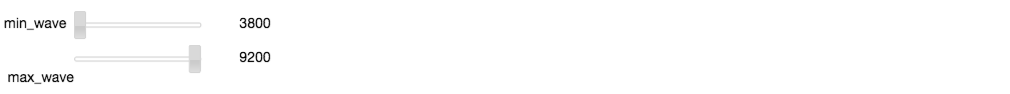

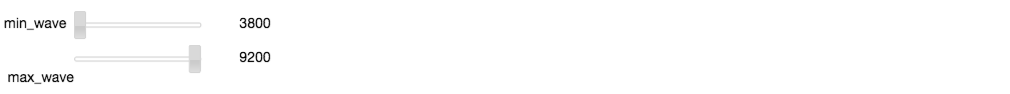

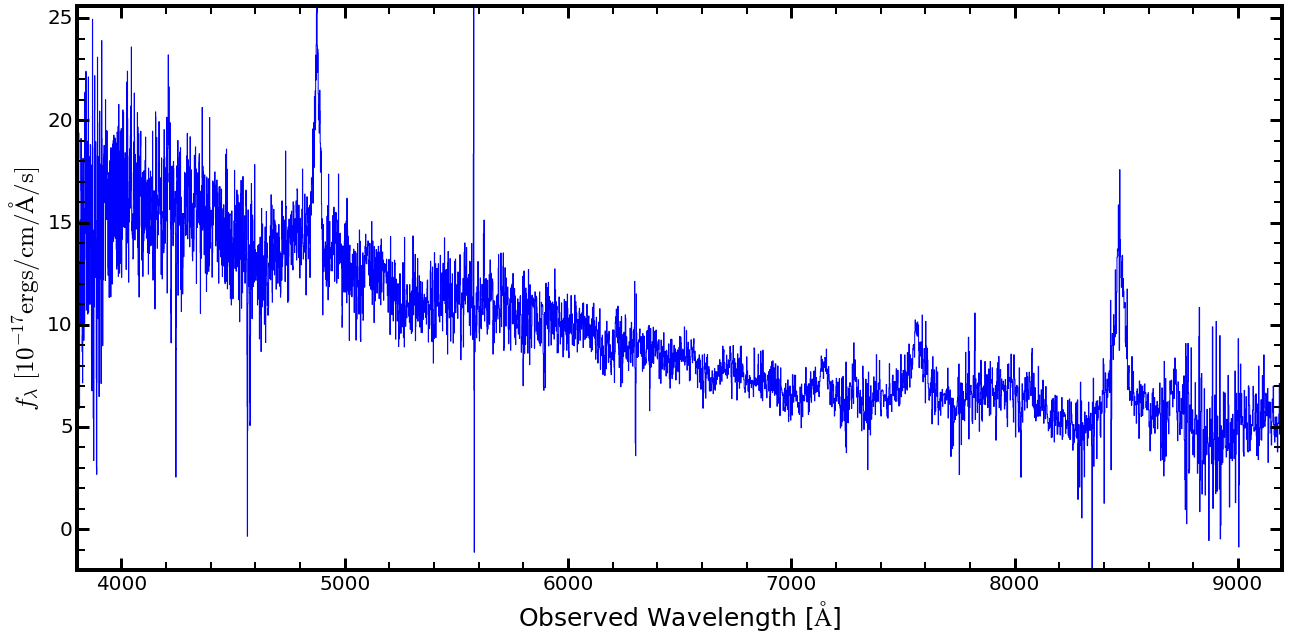

In [4]:
#Make the plot HUGE and vivid
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

# Use interact to explore the galaxy detection algorithm.
interact(plot_spec, min_wave=(3800, 9000, 100), max_wave=(4000,9200, 100));


<script src="https://npmcdn.com/jupyter-js-widgets@~1.1.2/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{
    "9fbd1ecab4b745c6b946f438f8ad102b": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "26f2d1c14b1e462b8df49e758e580cf0": {
        "model_name": "BoxModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "children": [
                "IPY_MODEL_b7b529fc290241099b04017d5e71f3f5",
                "IPY_MODEL_8c857d7b49ca445b9207cdf0693ad247"
            ],
            "layout": "IPY_MODEL_9fbd1ecab4b745c6b946f438f8ad102b",
            "_dom_classes": [
                "widget-interact"
            ]
        },
        "views": []
    },
    "58791f55cfd6440cbfad405f42a4fcfb": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "b7b529fc290241099b04017d5e71f3f5": {
        "model_name": "IntSliderModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "min": 3800,
            "max": 9000,
            "value": 6700,
            "layout": "IPY_MODEL_58791f55cfd6440cbfad405f42a4fcfb",
            "description": "min_wave",
            "step": 100
        },
        "views": []
    },
    "dffceca0c2974dc5af121679ccb8007a": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "8c857d7b49ca445b9207cdf0693ad247": {
        "model_name": "IntSliderModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "min": 4000,
            "max": 9200,
            "value": 7700,
            "layout": "IPY_MODEL_dffceca0c2974dc5af121679ccb8007a",
            "description": "max_wave",
            "step": 100
        },
        "views": []
    },
    "a3ccab00108f42149f36f33cd382cd2b": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "c59e7b0f3bd1491da99da3ba657833a4": {
        "model_name": "BoxModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "children": [
                "IPY_MODEL_c59993979bea44b3ac295d8dc18a412e",
                "IPY_MODEL_7f88c34246ee49acb2d32ab1a586df03"
            ],
            "layout": "IPY_MODEL_a3ccab00108f42149f36f33cd382cd2b",
            "_dom_classes": [
                "widget-interact"
            ]
        },
        "views": [
            {
                "cell_index": 5
            }
        ]
    },
    "68d83a99f6f44be5b51d4d9abe8f94c1": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "c59993979bea44b3ac295d8dc18a412e": {
        "model_name": "IntSliderModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "min": 3800,
            "value": 6200,
            "layout": "IPY_MODEL_68d83a99f6f44be5b51d4d9abe8f94c1",
            "description": "min_wave",
            "max": 9000,
            "step": 100
        },
        "views": []
    },
    "2e1a6eef109b4bc39185356f28c073ed": {
        "model_name": "LayoutModel",
        "model_module": "jupyter-js-widgets",
        "state": {},
        "views": []
    },
    "7f88c34246ee49acb2d32ab1a586df03": {
        "model_name": "IntSliderModel",
        "model_module": "jupyter-js-widgets",
        "state": {
            "min": 4000,
            "value": 7000,
            "layout": "IPY_MODEL_2e1a6eef109b4bc39185356f28c073ed",
            "description": "max_wave",
            "max": 9200,
            "step": 100
        },
        "views": []
    }
}</script>